# Testing and regularization

In [81]:
!git clone https://github.com/AbdelrhmanElsaied/ml-1
%cd  ml-1/polynomial_regression

Cloning into 'ml-1'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 108 (delta 53), reused 108 (delta 53), pack-reused 0 (from 0)
Receiving objects: 100% (108/108), 29.74 MiB | 16.81 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/ml-1/polynomial_regression/ml-1/polynomial_regression/ml-1/polynomial_regression


In [82]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

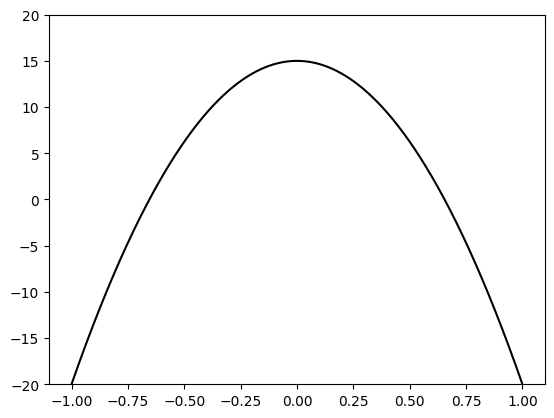

In [83]:
# Our original polynomial is -x^2+x+15
coefs = [15,0,-35]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [84]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)
X=np.array(X)
Y=np.array(Y)

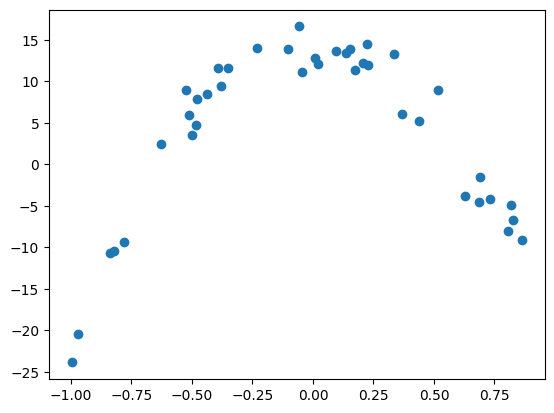

In [85]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [86]:
for datasample in zip(X,Y):
    print(datasample)

(np.float64(0.6888437030500962), np.float64(-1.503313676546703))
(np.float64(-0.4821664994140733), np.float64(4.776223391096098))
(np.float64(0.02254944273721704), np.float64(12.087957039273702))
(np.float64(-0.3933745478421451), np.float64(11.552655381342872))
(np.float64(-0.04680609169528838), np.float64(11.13939451533042))
(np.float64(0.009373711634780513), np.float64(12.810729063756577))
(np.float64(-0.43632431120059234), np.float64(8.437955069843738))
(np.float64(-0.4989873172751189), np.float64(3.511211911084044))
(np.float64(0.8194925119364802), np.float64(-4.879955934160179))
(np.float64(0.8043319008791654), np.float64(-8.0368585173616))
(np.float64(-0.37970486136133474), np.float64(9.412786903432224))
(np.float64(0.36796786383088254), np.float64(6.014161594638752))
(np.float64(-0.055714569094573285), np.float64(16.612588226930765))
(np.float64(0.2217739468876032), np.float64(14.540743210654112))
(np.float64(0.8260221064757964), np.float64(-6.653701461777612))
(np.float64(0.730

### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [87]:
from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
  poly=PolynomialFeatures(degree=polyDegree,include_bias=False)
  X_poly=poly.fit_transform(X.reshape(-1,1))
  return X_poly

    ## TODO ##
    #use sklearn (PolynomialFeatures method)


X_poly=addPoly(X,200)

In [88]:
print(X_poly.shape)
print(X_poly[0,:])

(40, 200)
[6.88843703e-01 4.74505647e-01 3.26860227e-01 2.25155609e-01
 1.55097024e-01 1.06837608e-01 7.35944136e-02 5.06950484e-02
 3.49209649e-02 2.40550867e-02 1.65701950e-02 1.14142745e-02
 7.86265112e-03 5.41613771e-03 3.73087236e-03 2.56998793e-03
 1.77032000e-03 1.21947379e-03 8.40026839e-04 5.78647198e-04
 3.98597479e-04 2.74571363e-04 1.89136755e-04 1.30285662e-04
 8.97464582e-05 6.18212826e-05 4.25852012e-05 2.93345477e-05
 2.02069185e-05 1.39194085e-05 9.58829693e-06 6.60483796e-06
 4.54970104e-06 3.13403291e-06 2.15885884e-06 1.48711632e-06
 1.02439071e-06 7.05645090e-07 4.86079177e-07 3.34832580e-07
 2.30647314e-07 1.58879950e-07 1.09443453e-07 7.53894335e-08
 5.19315366e-08 3.57727120e-08 2.46418074e-08 1.69743538e-08
 1.16926768e-08 8.05442676e-09 5.54824115e-09 3.82187098e-09
 2.63267176e-09 1.81349936e-09 1.24921762e-09 8.60515689e-10
 5.92760814e-10 4.08319554e-10 2.81268354e-10 1.93749934e-10
 1.33463422e-10 9.19354380e-11 6.33291475e-11 4.36238845e-11
 3.00500381e-1

## Splitting data into training and testing

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=0)


## TODO ##
# use sklearn (train_test_split) to split data to 80% training 20% testing



In [90]:
from sklearn.metrics import mean_squared_error
def display_results(model):
    coefs = [model.intercept_]
    coefs += list(model.coef_)
    ytrain_predict=model.predict(X_train)
    ytest_predict=model.predict(X_test)
    train_error=np.sqrt(mean_squared_error(y_train,ytrain_predict))
    test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
    print("Training error (rmse):", train_error)
    print("Testing error (rmse):", test_error)
    plt.scatter(X_train[:,0], y_train, marker='o')
    plt.scatter(X_test[:,0], y_test, marker='^')
    draw_polynomial(coefs)
    plt.show()
    print("Polynomial coefficients")
    print(coefs)

## Training a polynomial regression model with no regularization

---



In [91]:
from sklearn.linear_model import LinearRegression
model_no_reg=LinearRegression()
model_no_reg.fit(X_train,y_train)
## TODO ##
# use sklearn linear regression to fit the data
# normalization trick ;)

# model_no_reg =

LinearRegression()

Training error (rmse): 0.481721708399281
Testing error (rmse): 614241165888.7881


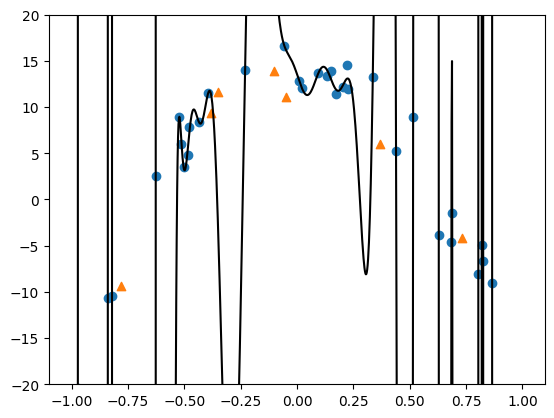

Polynomial coefficients
[np.float64(13.56704588079416), np.float64(-72.48869304124938), np.float64(-197.93035786277142), np.float64(13559.930449890084), np.float64(127180.06009791627), np.float64(-1888314.8407890738), np.float64(-5288709.917106412), np.float64(81529237.64163834), np.float64(88474575.4827646), np.float64(-1638624366.7430923), np.float64(-851049638.3258066), np.float64(18176506571.971687), np.float64(5629827149.458444), np.float64(-119171623996.6008), np.float64(-26369358139.60256), np.float64(467123983271.94135), np.float64(80135512743.03561), np.float64(-1037085789967.2758), np.float64(-138256840753.54556), np.float64(1028627023841.1432), np.float64(112349112455.37903), np.float64(190151179986.61127), np.float64(-27584766220.686028), np.float64(-783972035950.2493), np.float64(-40525712614.369865), np.float64(-440317267413.752), np.float64(83032849095.3651), np.float64(302628521386.1458), np.float64(104468121344.13933), np.float64(606275838869.4171), np.float64(-1867171

In [92]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [97]:
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.1)
model_L1_reg.fit(X_train,y_train)
## TODO ##
# use sklearn Lasso (linear regression with L1 Norm) to fit the data
# normalization trick ;)

Lasso(alpha=0.1)

Training error (rmse): 2.1130057075125483
Testing error (rmse): 2.4687527134055753


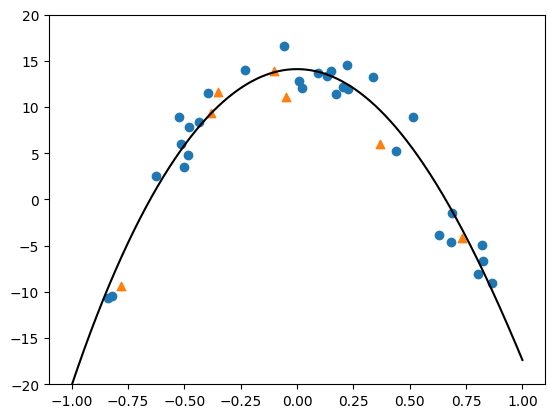

Polynomial coefficients
[np.float64(14.108103168909457), np.float64(-0.0), np.float64(-32.880306695358165), np.float64(0.0), np.float64(-0.0), np.float64(1.399026641368329), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.float64(0.0), np.float64(-0.0), np.

In [98]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [95]:
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.1)
model_L2_reg.fit(X_train,y_train)
## TODO ##
# use sklearn Ridge (linear regression with L2 Norm) to fit the data
# normalization trick ;)



Ridge(alpha=0.1)

Training error (rmse): 2.023239761592456
Testing error (rmse): 4.022771892031192


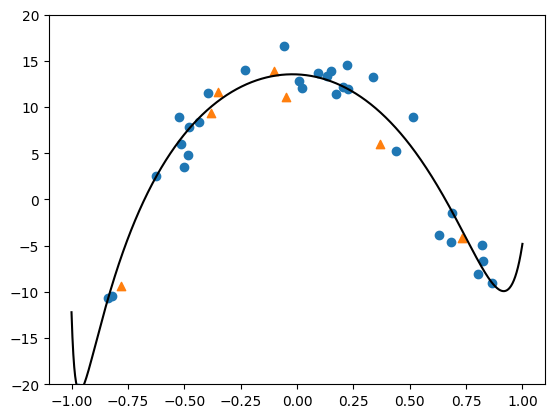

Polynomial coefficients
[np.float64(13.53797366027886), np.float64(-1.0436224232532307), np.float64(-25.651237073574315), np.float64(-0.941848674439385), np.float64(-9.650859670428368), np.float64(1.980436642460155), np.float64(-2.4101424791271233), np.float64(2.950469470188421), np.float64(0.2763545873530715), np.float64(2.7297221684086423), np.float64(1.1271409653187727), np.float64(2.1045106120458046), np.float64(1.280390747829025), np.float64(1.454098047775914), np.float64(1.192240693175902), np.float64(0.9127563839103746), np.float64(1.040825255062578), np.float64(0.504764562028681), np.float64(0.8912882522184895), np.float64(0.21417074329525898), np.float64(0.763559137200559), np.float64(0.015144956101859508), np.float64(0.6603519346733573), np.float64(-0.11663575421858591), np.float64(0.5785965907492754), np.float64(-0.20072303917037376), np.float64(0.5139285018014895), np.float64(-0.25174153320694587), np.float64(0.4622977997881572), np.float64(-0.2802140209157122), np.float64(

In [96]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [ ]:
import pandas as pd
from IPython.display import display
predictions={}
predictions ['x']=X_test[:,0]
predictions ['y']=y_test
predictions['No reg'] = model_no_reg.predict(X_test)
predictions['L1 reg'] = model_L1_reg.predict(X_test)
predictions['L2 reg'] = model_L2_reg.predict(X_test)
predictions=pd.DataFrame.from_dict(predictions)
display(predictions)

### Real Example (Predict fuel efficiency)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [99]:
#### Get data

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()

#### Clean data

dataset.isna().sum()

dataset = dataset.dropna()

dataset.isna().sum()

dataset.head()

dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

#### normal linear regression

In [ ]:
# normal linear regression
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]
X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_train, y_train)
ytest_predict=model_no_reg.predict(X_test)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.5639128558497175


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


#### using 50th order

In [ ]:
X_train=train_dataset[['Horsepower']]
y_train=train_dataset[['MPG']]

X_test=test_dataset[['Horsepower']]
y_test=test_dataset[['MPG']]

from sklearn.preprocessing import PolynomialFeatures
def addPoly(X,polyDegree):
    poly = PolynomialFeatures(polyDegree,include_bias=False)
    X=poly.fit_transform(X)
    return X
X_trainPoly=addPoly(X_train,50)
X_testPoly=addPoly(X_test,50)

##### no regularization

In [ ]:
# no regularization
from sklearn.linear_model import LinearRegression
model_no_reg = LinearRegression(normalize=True)
model_no_reg.fit(X_trainPoly, y_train)
ytest_predict=model_no_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

62673.21197656972


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


##### lasso regularization

In [ ]:
# lasso regularization
from sklearn import linear_model
model_L1_reg = linear_model.Lasso(alpha=0.01,normalize=True)
model_L1_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L1_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

4.020606257556758


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


##### ridge regularization

In [ ]:
# ridge regularization
from sklearn import linear_model
model_L2_reg = linear_model.Ridge(alpha=0.01,normalize=True)
model_L2_reg.fit(X_trainPoly, y_train)
ytest_predict=model_L2_reg.predict(X_testPoly)
test_error=np.sqrt(mean_squared_error(y_test,ytest_predict))
print(test_error)

3.7867550327271036


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
